## **Experiment: Hyperparameter Tuning**

### **Apply Features for Modelling**

In [1]:
import pandas as pd

file_path = "C:/Users/HS/Downloads/FYP_Datasets/Scaled_Dataset.csv"
model_df = pd.read_csv(file_path)

# View summary statistics of 'Sales'
print("Summary Statistics:\n", model_df['Sales'].describe())

features = model_df[['Discount', 'Profit', 'Sales_rolling_mean', 'Sales_rolling_std',
       'Sales_ewma', 'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
       'order_quarterofyear_sin', 'order_quarterofyear_cos']]

Summary Statistics:
 count    6695.000000
mean      137.921241
std       134.833113
min         3.990000
25%        44.100000
50%        90.900000
75%       184.513500
max       727.500000
Name: Sales, dtype: float64


### **Training and Testing Data Split**

In [2]:
from sklearn.model_selection import train_test_split

X = features
y = model_df['Sales']

# Split data into training-testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Experiment 2: Random Forest Model**

In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define model
rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=100,
    min_samples_split=2,
    random_state=42)
rf_model.fit(X_train, y_train)

# Make prediction for test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

model_performance = pd.DataFrame({'Model': ['Random Forest'], 'MAE': [rf_mae], 'MSE': [rf_mse], 'RMSE': [rf_rmse], 'R² Score': [rf_r2]})

print(f"Random Forest Model Performance Evaluation:")
print(f"MAE: {rf_mae:.5f}")
print(f"MSE: {rf_mse:.8f}")
print(f"RMSE: {rf_rmse:.5f}")
print(f"R² Score: {rf_r2:.5f}")

Random Forest Model Performance Evaluation:
MAE: 10.32028
MSE: 212.63271850
RMSE: 14.58193
R² Score: 0.98822


C:\Users\HS\AppData\Local\Temp\ipykernel_21608\4172115605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_rf['RF Predicted Sales'] = rf_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\4172115605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_rf['Order Date'] = pd.to_datetime(sales_rf['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\4172115605.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

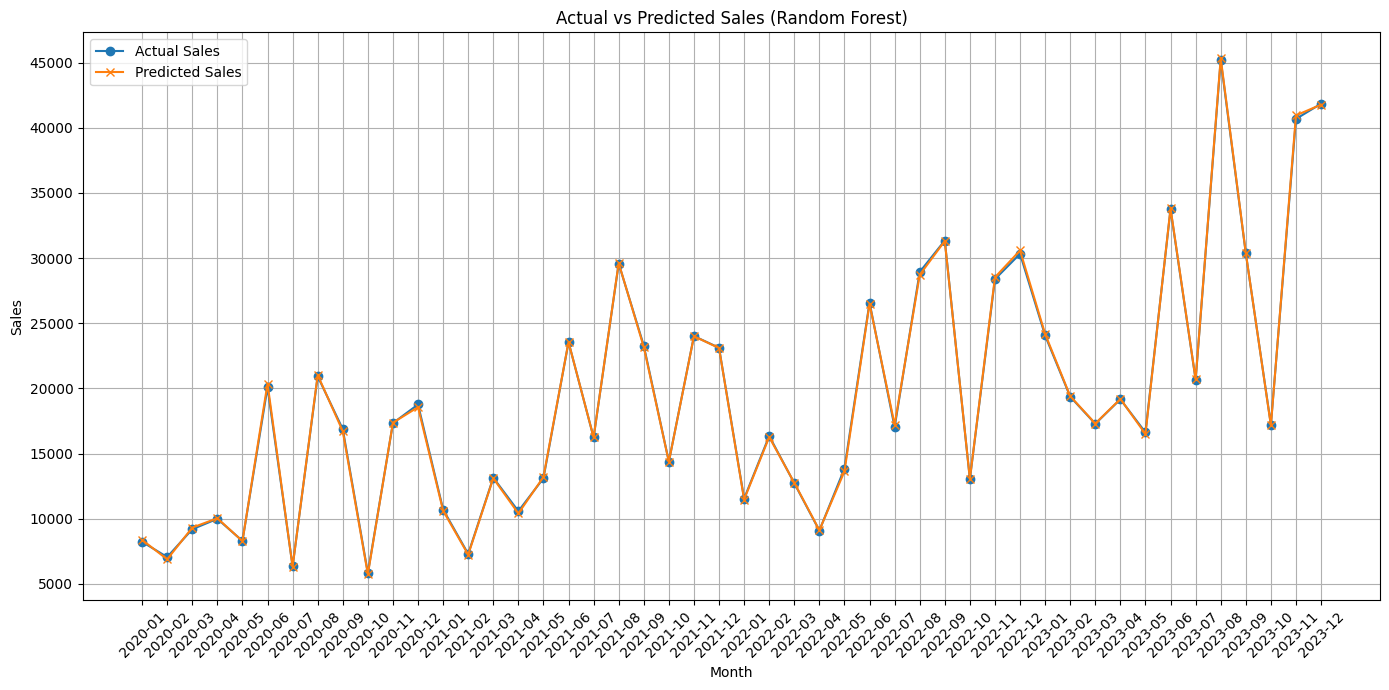

In [4]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
rf_y_all_pred = rf_model.predict(X)

sales_rf = model_df[['Order Date', 'Sales']]

sales_rf['RF Predicted Sales'] = rf_y_all_pred

# Convert 'Order Date' to datetime format
sales_rf['Order Date'] = pd.to_datetime(sales_rf['Order Date'])

exp_data = sales_rf['RF Predicted Sales']

# Aggregate sales by month and year
sales_rf['Month'] = sales_rf['Order Date'].dt.to_period('M')
mth_sales_rf = sales_rf.groupby('Month').agg({'Sales': 'sum', 'RF Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_rf['Month'].astype(str), mth_sales_rf['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_rf['Month'].astype(str), mth_sales_rf['RF Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

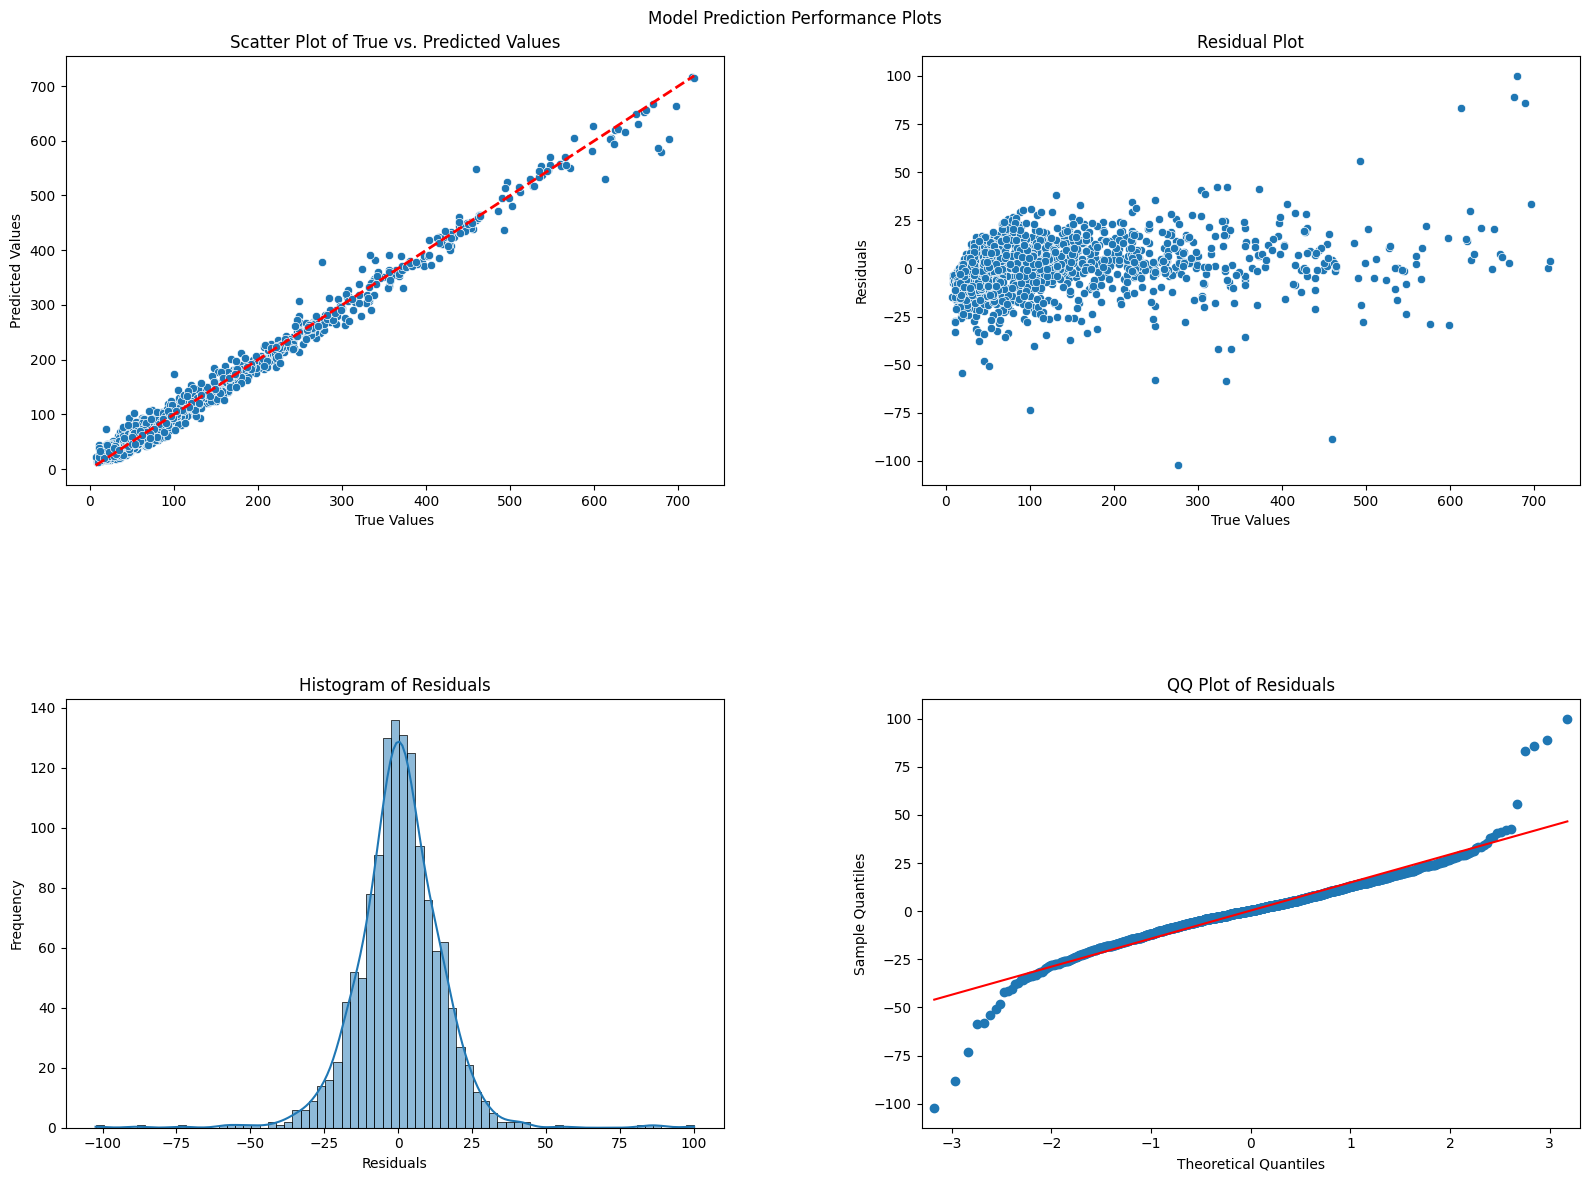

In [5]:
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - rf_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=rf_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### **Experiment 3: Extreme Gradient Boosting Model**

In [6]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define model
xgb_model = XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=6,
    random_state=42)
xgb_model.fit(X_train, y_train)

# Make prediction for test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'XGBoost', 'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse, 'R² Score': xgb_r2}])], ignore_index=True)

print(f"XGBoost Model Performance Evaluation:")
print(f"MAE: {xgb_mae:.5f}")
print(f"MSE: {xgb_mse:.8f}")
print(f"RMSE: {xgb_rmse:.5f}")
print(f"R² Score: {xgb_r2:.5f}")

XGBoost Model Performance Evaluation:
MAE: 7.76870
MSE: 149.75255115
RMSE: 12.23734
R² Score: 0.99171


C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1902917345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_xgb['XGB Predicted Sales'] = xgb_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1902917345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_xgb['Order Date'] = pd.to_datetime(sales_xgb['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1902917345.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

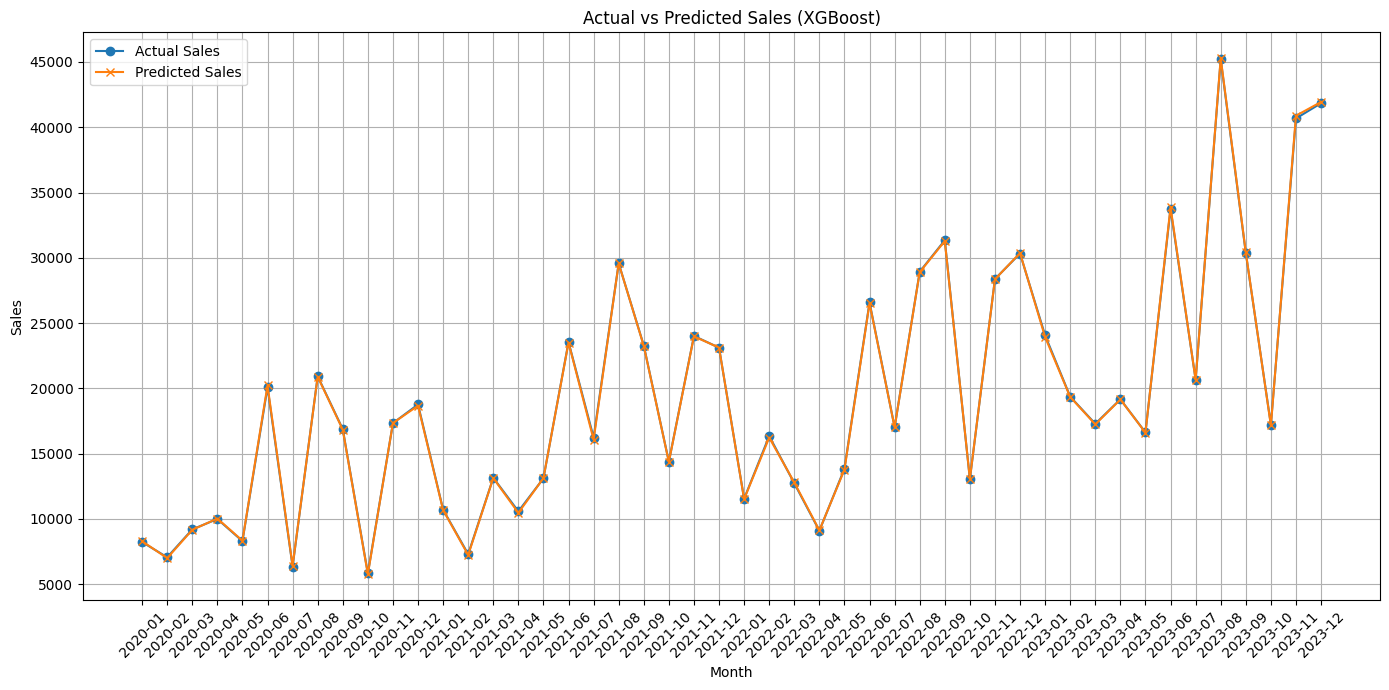

In [7]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
xgb_y_all_pred = xgb_model.predict(X)

sales_xgb = model_df[['Order Date', 'Sales']]

sales_xgb['XGB Predicted Sales'] = xgb_y_all_pred

# Convert 'Order Date' to datetime format
sales_xgb['Order Date'] = pd.to_datetime(sales_xgb['Order Date'])

exp_data = sales_xgb['XGB Predicted Sales']

# Aggregate sales by month and year
sales_xgb['Month'] = sales_xgb['Order Date'].dt.to_period('M')
mth_sales_xgb = sales_xgb.groupby('Month').agg({'Sales': 'sum', 'XGB Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_xgb['Month'].astype(str), mth_sales_xgb['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_xgb['Month'].astype(str), mth_sales_xgb['XGB Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (XGBoost)')
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

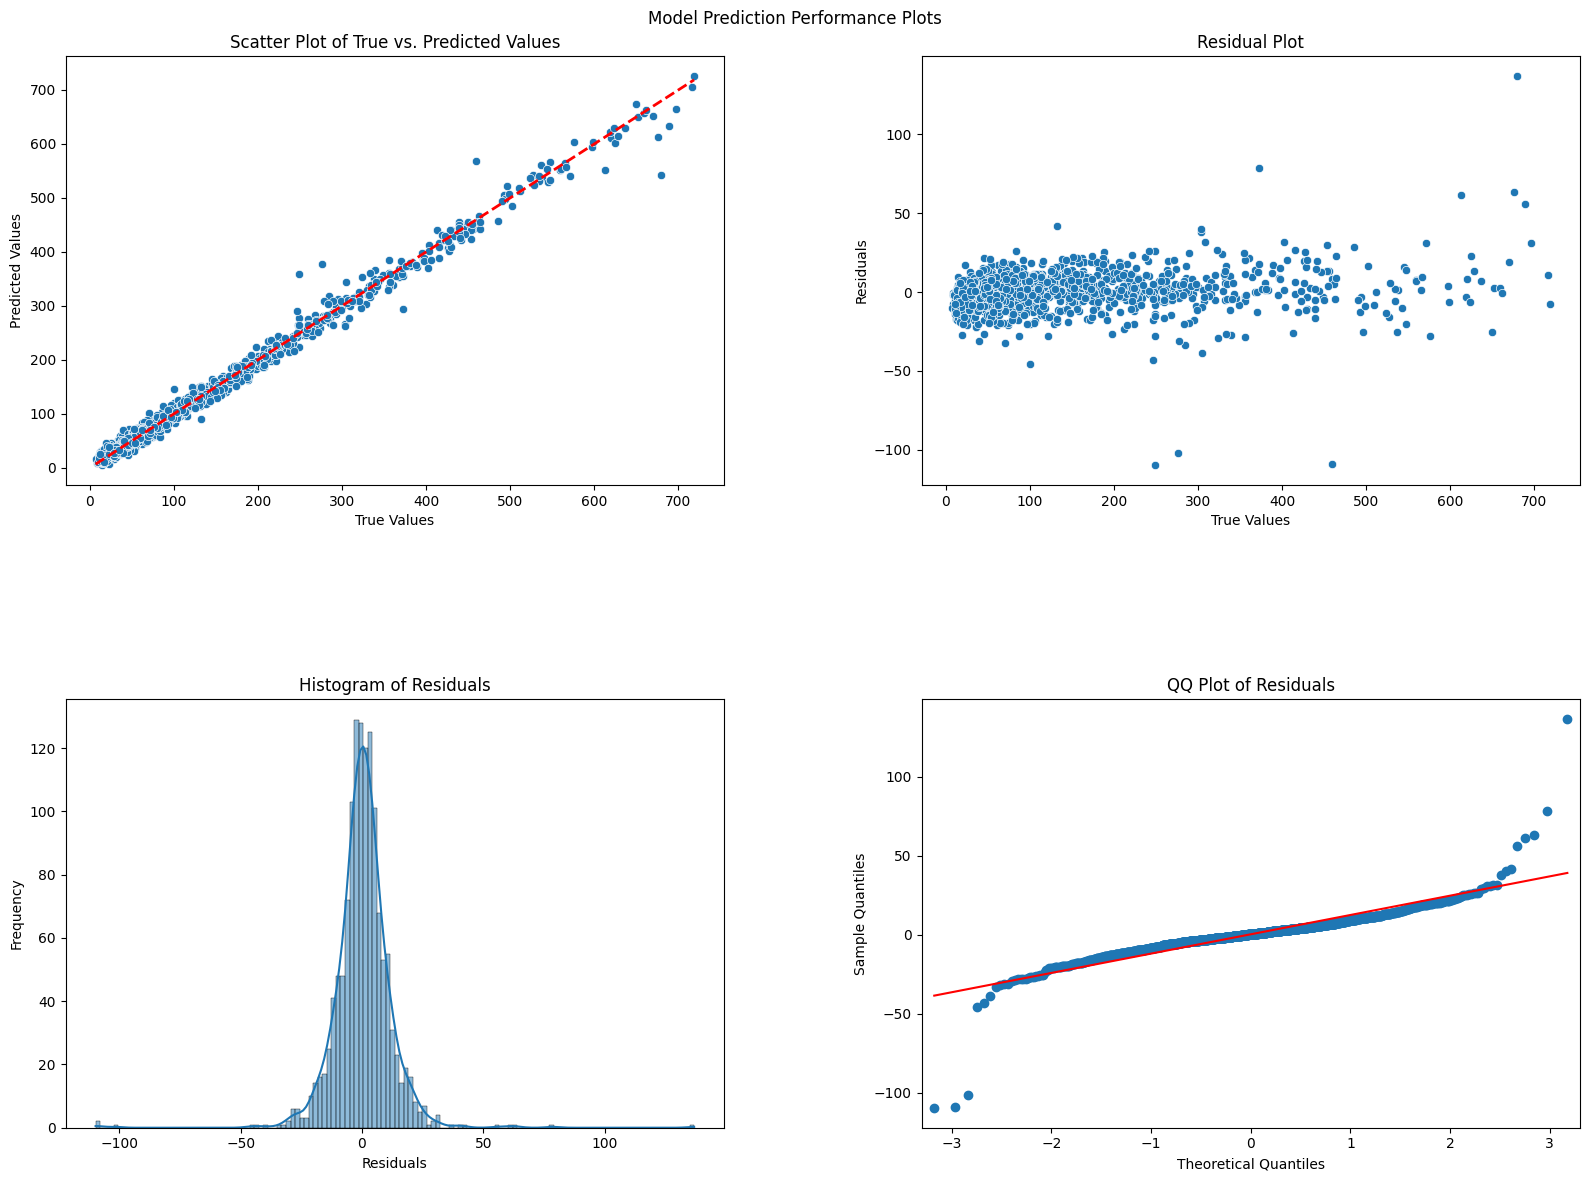

In [8]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - xgb_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=xgb_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### **Experiment 4: SVM Model**

In [9]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model
svm_model = SVR(
    C=1000,
    kernel='poly',
    gamma=1
)
svm_model.fit(X_train, y_train)

# Make prediction
svm_y_pred = svm_model.predict(X_test)

# Evaluate model
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'SVM', 'MAE': svm_mae, 'MSE': svm_mse, 'RMSE': svm_rmse, 'R² Score': svm_r2}])], ignore_index=True)

print(f"SVM Model Performance Evaluation:")
print(f"MAE: {svm_mae:.5f}")
print(f"MSE: {svm_mse:.8f}")
print(f"RMSE: {svm_rmse:.5f}")
print(f"R² Score: {svm_r2:.5f}")

SVM Model Performance Evaluation:
MAE: 4.42163
MSE: 36.19148241
RMSE: 6.01594
R² Score: 0.99800


C:\Users\HS\AppData\Local\Temp\ipykernel_21608\208772102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['SVM Predicted Sales'] = svm_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\208772102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\208772102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

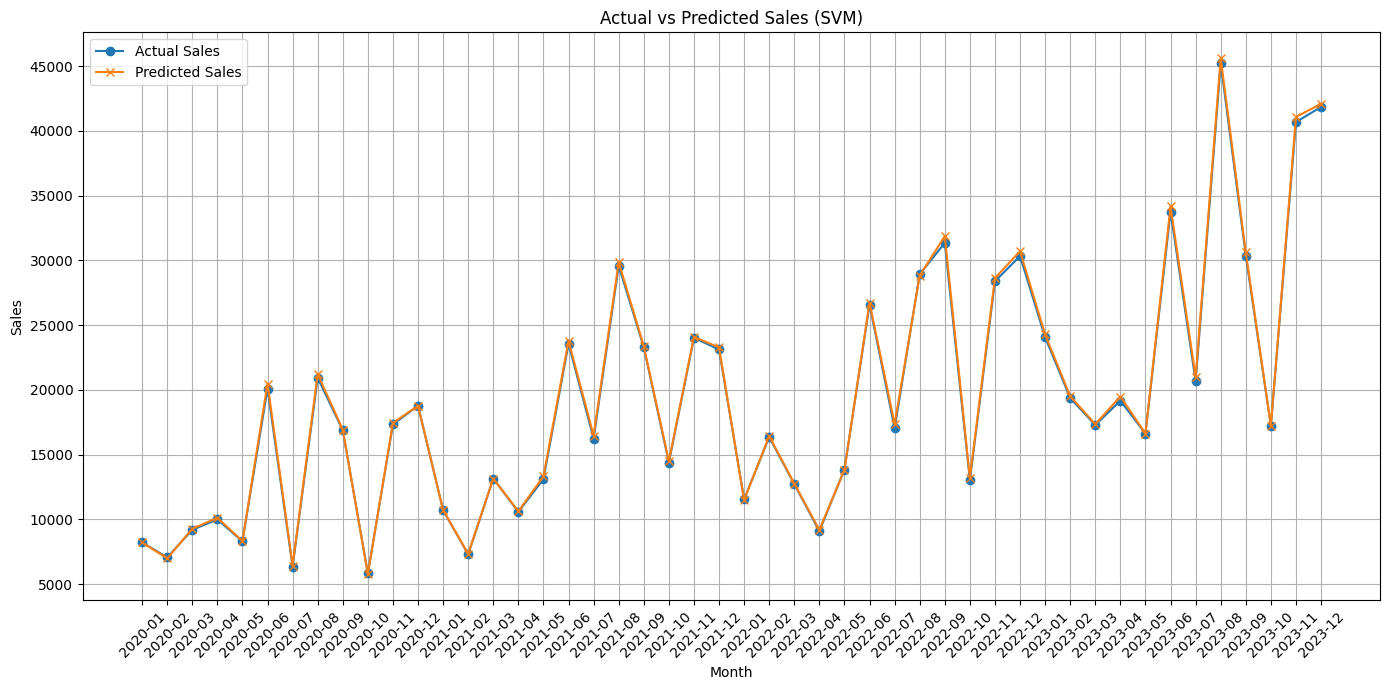

In [10]:
# Make prediction for entire dataset
svm_y_all_pred = svm_model.predict(X)

sales_svm = model_df[['Order Date', 'Sales']]

sales_svm['SVM Predicted Sales'] = svm_y_all_pred

# Convert 'Order Date' to datetime format
sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])

exp_data = sales_svm['SVM Predicted Sales']

# Aggregate sales by month and year
sales_svm['Month'] = sales_svm['Order Date'].dt.to_period('M')
mth_sales_svm = sales_svm.groupby('Month').agg({'Sales': 'sum', 'SVM Predicted Sales': 'sum', }).reset_index()

import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SVM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

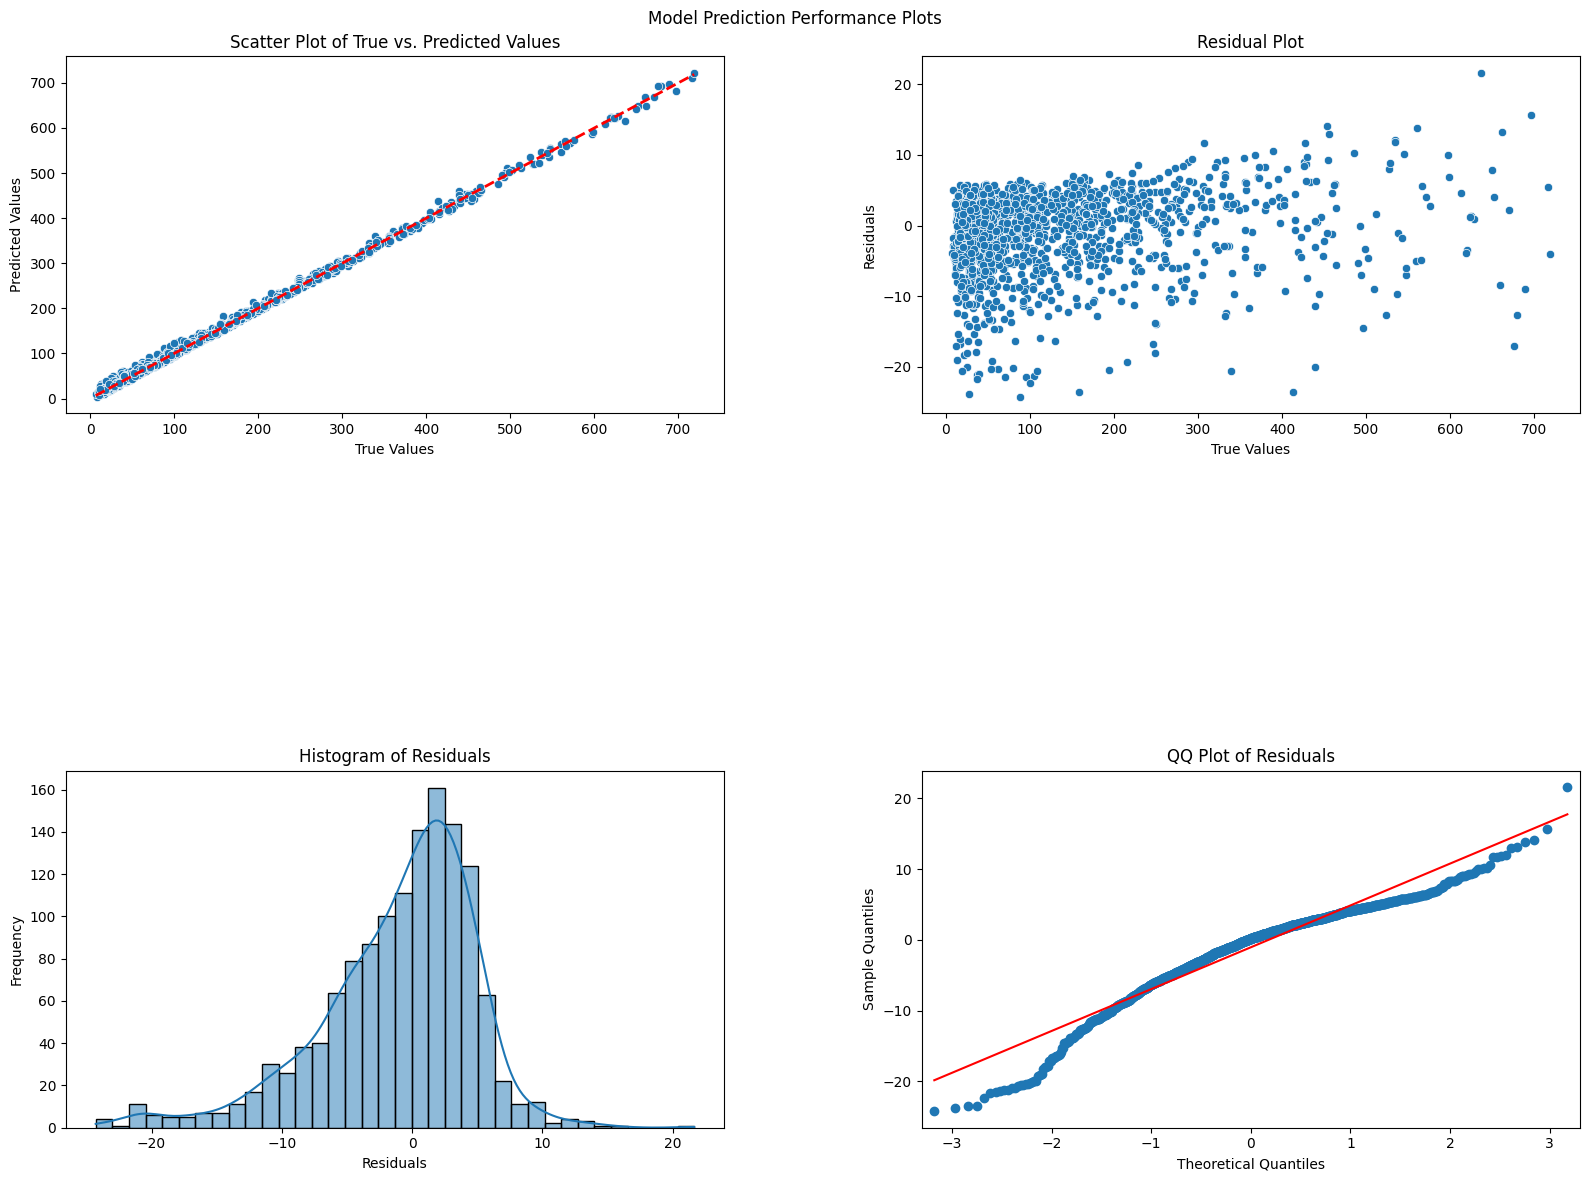

In [11]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - svm_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=svm_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

### **Experiment 5: Artificial Neural Network Model**

In [12]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model
ann_model = MLPRegressor(
    hidden_layer_sizes=(200, 100, 50),
    activation='identity',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
    )
ann_model.fit(X_train, y_train)

# Make prediction
ann_y_pred = ann_model.predict(X_test)

# Evaluate model
ann_mae = mean_absolute_error(y_test, ann_y_pred)
ann_mse = mean_squared_error(y_test, ann_y_pred)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, ann_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'ANN', 'MAE': ann_mae, 'MSE': ann_mse, 'RMSE': ann_rmse, 'R² Score': ann_r2}])], ignore_index=True)

print(f"ANN Model Performance Evaluation:")
print(f"MAE: {ann_mae:.5f}")
print(f"MSE: {ann_mse:.8f}")
print(f"RMSE: {ann_rmse:.5f}")
print(f"R² Score: {ann_r2:.5f}")

ANN Model Performance Evaluation:
MAE: 5.69716
MSE: 45.20426027
RMSE: 6.72341
R² Score: 0.99750


C:\Users\HS\AppData\Local\Temp\ipykernel_21608\2732977142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_ann['ANN Predicted Sales'] = ann_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\2732977142.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_ann['Order Date'] = pd.to_datetime(sales_ann['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\2732977142.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

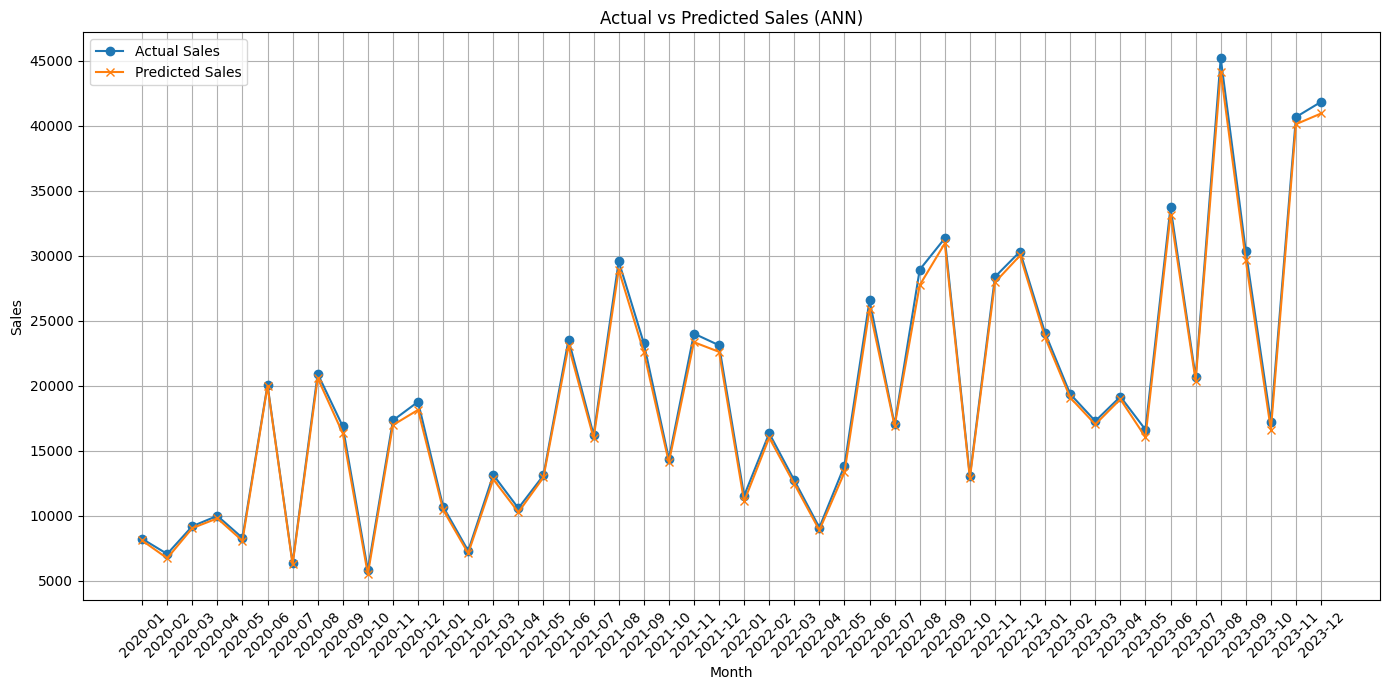

In [13]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
ann_y_all_pred = ann_model.predict(X)

sales_ann = model_df[['Order Date', 'Sales']]

sales_ann['ANN Predicted Sales'] = ann_y_all_pred

# Convert 'Order Date' to datetime format
sales_ann['Order Date'] = pd.to_datetime(sales_ann['Order Date'])

exp_data = sales_ann['ANN Predicted Sales']

# Aggregate sales by month and year
sales_ann['Month'] = sales_ann['Order Date'].dt.to_period('M')
mth_sales_ann = sales_ann.groupby('Month').agg({'Sales': 'sum', 'ANN Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_ann['Month'].astype(str), mth_sales_ann['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_ann['Month'].astype(str), mth_sales_ann['ANN Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (ANN)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

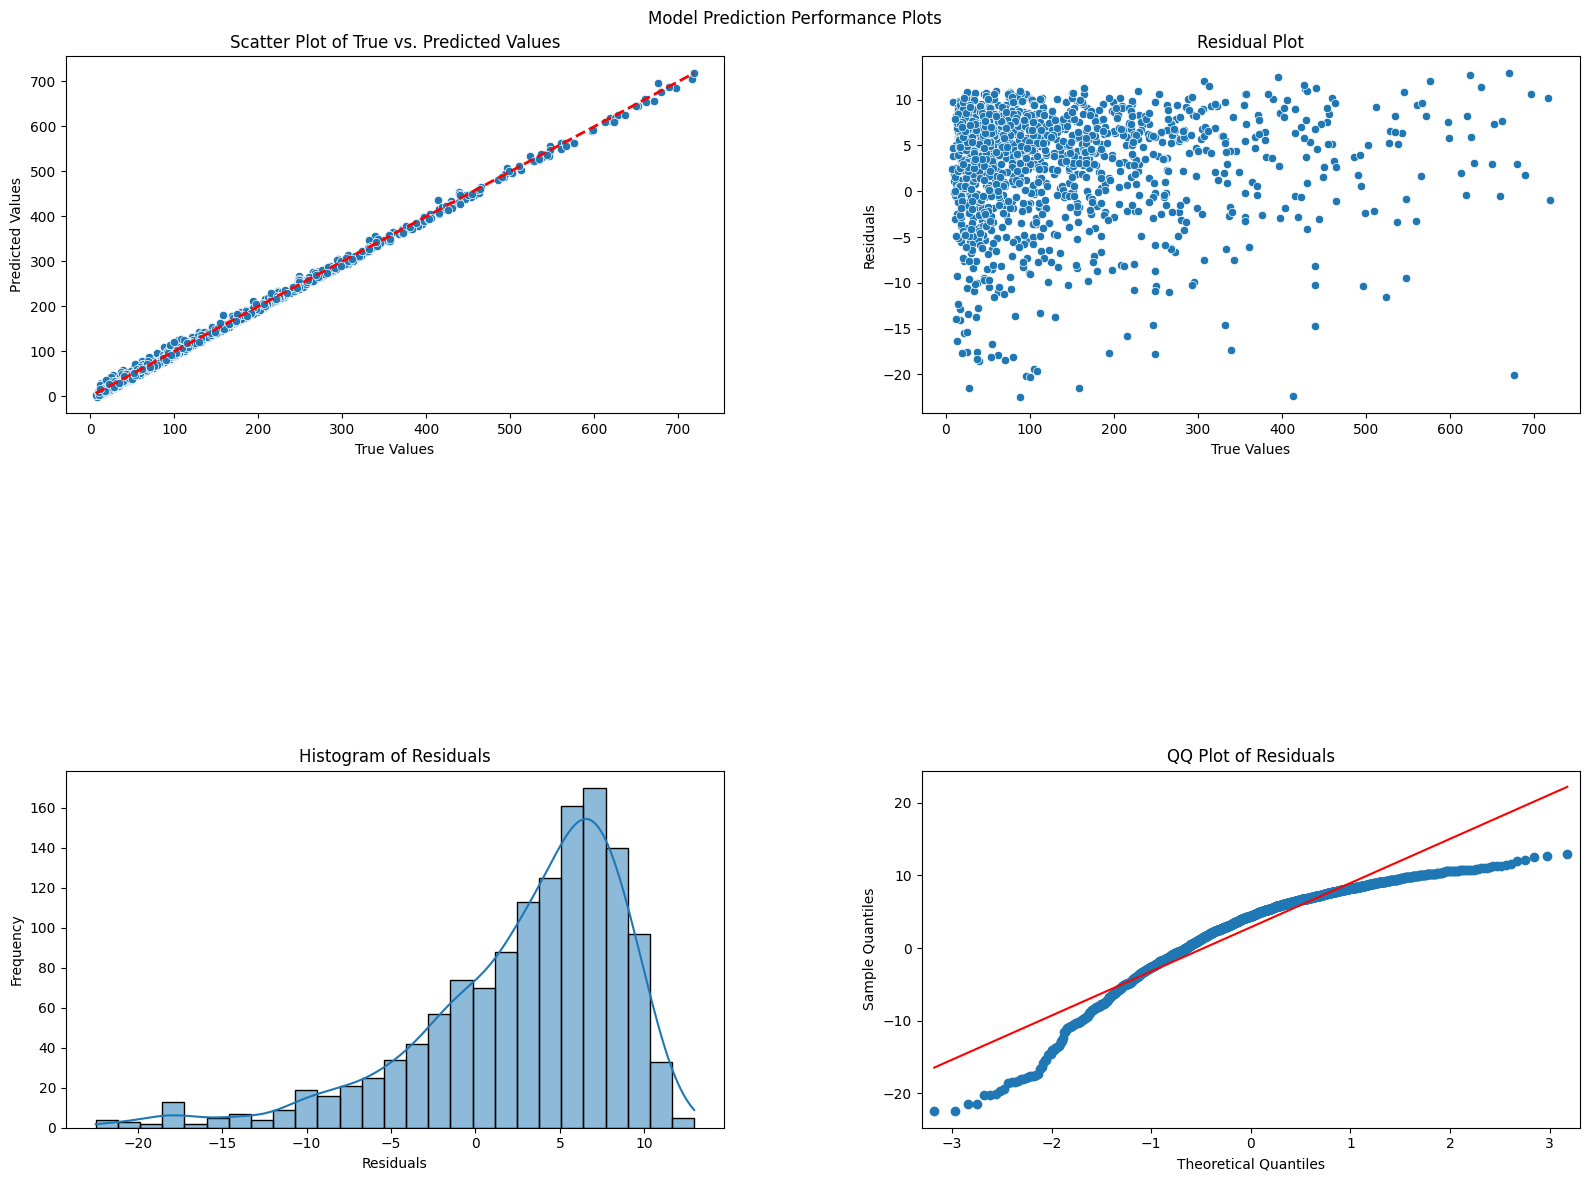

In [14]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - ann_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=ann_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

### **Experiment 6: Long Short-Term Memory Model**

In [15]:
from sklearn.model_selection import train_test_split

X = features.values
y = model_df['Sales'].values

# Reshape data into 3D input: samples, timestep = 1, features
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(1))
optimizer = Adam(learning_rate=0.1)
lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(
    X_train, y_train, epochs=100, batch_size=64, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], verbose=2
)

# Make prediction for test set
lstm_y_pred = lstm_model.predict(X_test)

# Reshape predictions to original
lstm_y_pred = lstm_y_pred.reshape(-1)
y_test = y_test.reshape(-1)

# Evaluate model
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'LSTM', 'MAE': lstm_mae, 'MSE': lstm_mse, 'RMSE': lstm_rmse, 'R² Score': lstm_r2}])], ignore_index=True)

print(f"LSTM Model Performance Evaluation:")
print(f"MAE: {lstm_mae:.5f}")
print(f"MSE: {lstm_mse:.8f}")
print(f"RMSE: {lstm_rmse:.5f}")
print(f"R² Score: {lstm_r2:.5f}")

Epoch 1/100


c:\Users\HS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 - 3s - 41ms/step - loss: 20451.5762 - val_loss: 18067.5273
Epoch 2/100
84/84 - 0s - 4ms/step - loss: 17095.9805 - val_loss: 14985.4717
Epoch 3/100
84/84 - 0s - 4ms/step - loss: 12057.2646 - val_loss: 8136.0737
Epoch 4/100
84/84 - 0s - 4ms/step - loss: 5317.7969 - val_loss: 2586.3464
Epoch 5/100
84/84 - 0s - 4ms/step - loss: 1635.8740 - val_loss: 789.0138
Epoch 6/100
84/84 - 0s - 4ms/step - loss: 580.8391 - val_loss: 353.3170
Epoch 7/100
84/84 - 0s - 4ms/step - loss: 285.2605 - val_loss: 206.5095
Epoch 8/100
84/84 - 0s - 4ms/step - loss: 167.4891 - val_loss: 140.3610
Epoch 9/100
84/84 - 0s - 4ms/step - loss: 113.9729 - val_loss: 96.3661
Epoch 10/100
84/84 - 0s - 4ms/step - loss: 91.4469 - val_loss: 73.9955
Epoch 11/100
84/84 - 0s - 4ms/step - loss: 79.2514 - val_loss: 65.8701
Epoch 12/100
84/84 - 0s - 4ms/step - loss: 71.8719 - val_loss: 60.6054
Epoch 13/100
84/84 - 0s - 4ms/step - loss: 66.8319 - val_loss: 57.8992
Epoch 14/100
84/84 - 0s - 4ms/step - loss: 63.5074 - val_loss: 56.

210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1842274162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_lstm['LSTM Predicted Sales'] = lstm_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1842274162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_lstm['Order Date'] = pd.to_datetime(sales_lstm['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_21608\1842274162.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

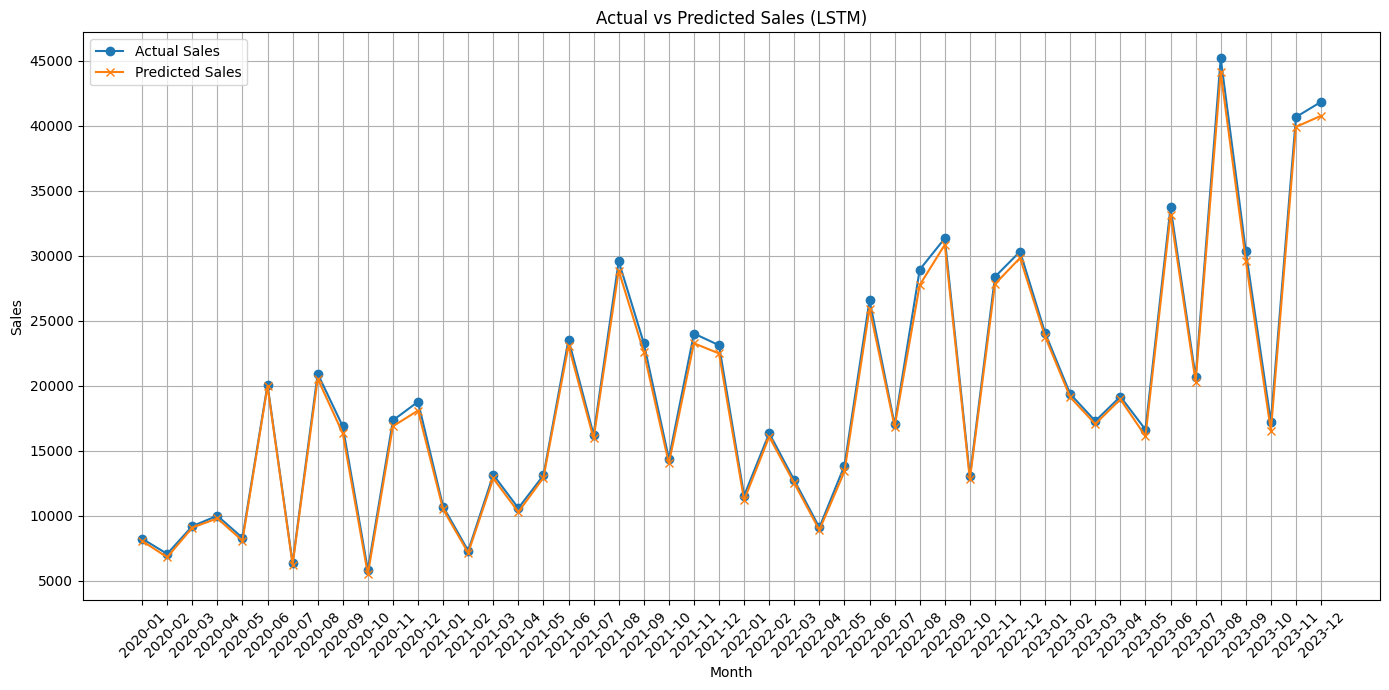

In [17]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
lstm_y_all_pred = lstm_model.predict(X)

sales_lstm = model_df[['Order Date', 'Sales']]

sales_lstm['LSTM Predicted Sales'] = lstm_y_all_pred

# Convert 'Order Date' to datetime format
sales_lstm['Order Date'] = pd.to_datetime(sales_lstm['Order Date'])

exp_data = sales_lstm['LSTM Predicted Sales']

# Aggregate sales by month and year
sales_lstm['Month'] = sales_lstm['Order Date'].dt.to_period('M')
mth_sales_lstm = sales_lstm.groupby('Month').agg({'Sales': 'sum', 'LSTM Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_lstm['Month'].astype(str), mth_sales_lstm['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_lstm['Month'].astype(str), mth_sales_lstm['LSTM Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (LSTM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

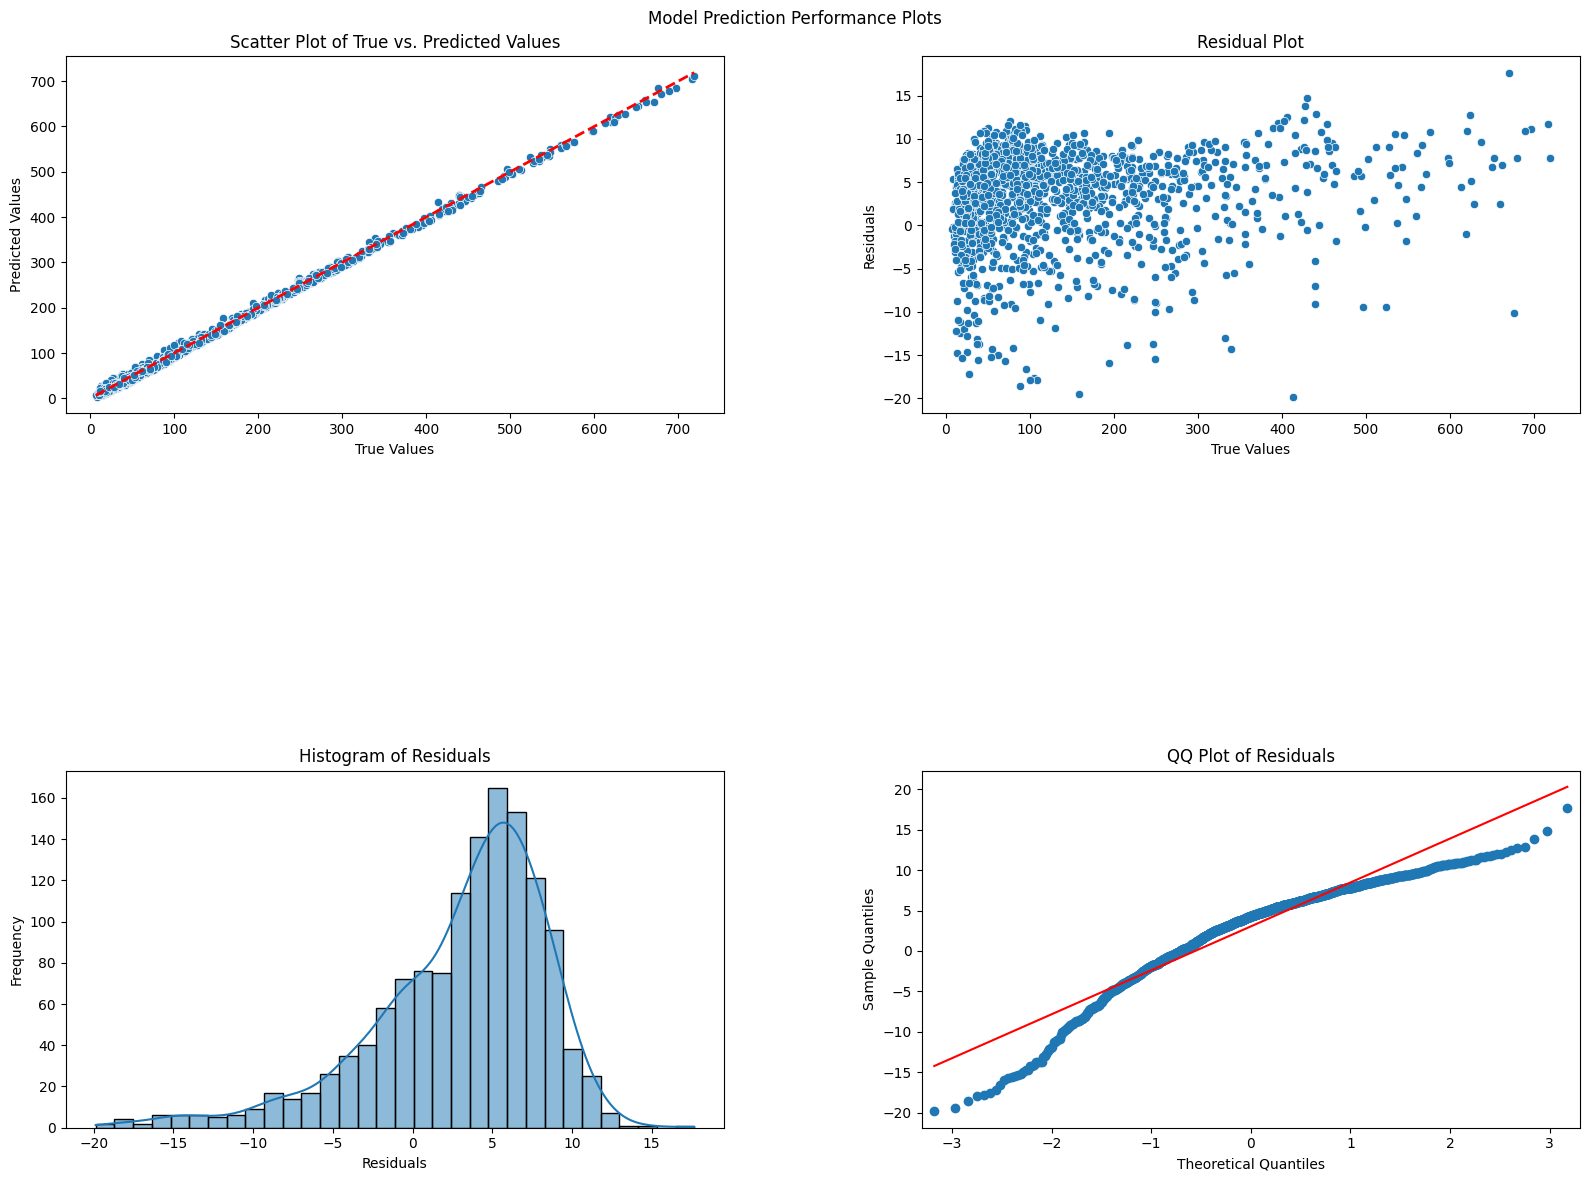

In [18]:
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - lstm_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=lstm_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

# Adjust the layout and display the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

In [19]:
# Combine all predicted sales columns
pred_sales = model_df[['Order Date', 'Sales']].copy()
pred_sales['RF Predicted Sales'] = rf_y_all_pred
pred_sales['XGB Predicted Sales'] = xgb_y_all_pred
pred_sales['SVM Predicted Sales'] = svm_y_all_pred
pred_sales['ANN Predicted Sales'] = ann_y_all_pred
pred_sales['LSTM Predicted Sales'] = lstm_y_all_pred

# Convert 'Order Date' to datetime format
pred_sales['Order Date'] = pd.to_datetime(pred_sales['Order Date'])

# Aggregate sales by month and year
pred_sales['Month'] = pred_sales['Order Date'].dt.to_period('M')
agg_sales = pred_sales.groupby('Month').agg({'Sales': 'sum', 'RF Predicted Sales': 'sum', 'XGB Predicted Sales': 'sum', 'SVM Predicted Sales': 'sum', 'ANN Predicted Sales': 'sum', 'LSTM Predicted Sales': 'sum'}).reset_index()

pred_sales.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Tuning_Prediction_Monthly_Sales.csv", index=False)
agg_sales.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Tuning_Prediction_Aggregated_Monthly_Sales.csv", index=False)
model_performance.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Tuning_Performance.csv", index=False)
print(f"Datasets have been exported")

Datasets have been exported


In [20]:
# Rank the models
model_performance['Rank'] = model_performance[['MAE', 'MSE', 'RMSE', 'R² Score']].rank(ascending=[True, True, True, False]).mean(axis=1)
model_performance = model_performance.sort_values(by='Rank').reset_index(drop=True)
print(model_performance)

           Model        MAE         MSE       RMSE  R² Score  Rank
0            SVM   4.421633   36.191482   6.015936  0.997995   2.0
1           LSTM   5.291661   38.770685   6.226611  0.997853   2.5
2            ANN   5.697164   45.204260   6.723411  0.997496   3.0
3        XGBoost   7.768700  149.752551  12.237342  0.991705   3.5
4  Random Forest  10.320276  212.632719  14.581931  0.988223   4.0
